# Biblioteca

In [1]:
import pandas as pd
import os

# Upload do arquivo

In [2]:
lista = [x for x in os.listdir() if '.csv' in  x]
lista.reverse()

aux =[]
for x in lista:
    a = pd.read_csv(x, encoding='latin1', sep = ';', low_memory = False)
    aux.append(a)
df = pd.concat(aux).drop_duplicates()

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096838 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Id                object 
 1   Data Pesca        object 
 2   Embarcação        object 
 3   Espécie           object 
 4   Qtd(Kg)           object 
 5   Valor(R$)         float64
 6   Valor Total (R$)  float64
 7   Unnamed: 7        float64
 8   Unnamed: 8        float64
dtypes: float64(4), object(5)
memory usage: 160.0+ MB


In [4]:
df

,Id,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$),Unnamed: 7,Unnamed: 8
0,1,02/01/20,Monte Sião,7B,"7,0",NaN,NaN,NaN,NaN
1,2,02/01/20,Geremias,marisco limpo,"7,0",NaN,NaN,NaN,NaN
2,3,02/01/20,Geremias,marisco c/ casca,"25,0",NaN,NaN,NaN,NaN
3,4,02/01/20,Varão de Guerra - Ref Cabocla,7B,"111,0",NaN,NaN,NaN,NaN
4,5,02/01/20,Varão de Guerra - Ref Cabocla,branco,"1,2",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1048570,1042630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,1042631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,1042632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,1042633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpeza de colunas

In [5]:
#Limpeza do df
df = df.dropna(subset = df.columns.difference(['Id']), how='all')

df.set_index('Id', inplace=True)

df = df.copy()
df.drop(columns=['Unnamed: 7', 'Unnamed: 8'], inplace=True)

df = df.drop_duplicates()

df

,Data Pesca,Embarcação,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
Id,,,,,,
1,02/01/20,Monte Sião,7B,"7,0",NaN,NaN
2,02/01/20,Geremias,marisco limpo,"7,0",NaN,NaN
3,02/01/20,Geremias,marisco c/ casca,"25,0",NaN,NaN
4,02/01/20,Varão de Guerra - Ref Cabocla,7B,"111,0",NaN,NaN
5,02/01/20,Varão de Guerra - Ref Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...
5623.0,31/12/2020,camandante França ref.Marcelo Filho,arraia,"8,0",NaN,NaN
5624.0,31/12/2020,camandante França ref.Marcelo Filho,mistura,"21,0",NaN,NaN
5625.0,31/12/2020,camandante França ref.Marcelo Filho,linguado p,"13,0",NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11373 entries, 1 to 5627.0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data Pesca        11373 non-null  object 
 1   Embarcação        11238 non-null  object 
 2   Espécie           11218 non-null  object 
 3   Qtd(Kg)           11336 non-null  object 
 4   Valor(R$)         0 non-null      float64
 5   Valor Total (R$)  0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 622.0+ KB


In [7]:
# Converter a colunas
import numpy as np

# Função para converter colunas para número, lidando com valores não numéricos
def convert_to_number(s):
    s = s.str.replace('[^0-9,]', '', regex=True)
    s = s.str.replace(',', '.')
    return pd.to_numeric(s, errors='coerce')

df['Data Pesca'] = pd.to_datetime(df['Data Pesca'], format='%d/%m/%y', dayfirst=True, errors='coerce')
df['Data Pesca'] = df['Data Pesca'].fillna(method='ffill')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11373 entries, 1 to 5627.0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data Pesca        11373 non-null  datetime64[ns]
 1   Embarcação        11238 non-null  object        
 2   Espécie           11218 non-null  object        
 3   Qtd(Kg)           11336 non-null  object        
 4   Valor(R$)         0 non-null      float64       
 5   Valor Total (R$)  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 622.0+ KB


# Nome das Embarcações

In [8]:
# Verificar quantidade de valores unicos
df['Embarcação'].nunique()

713

In [9]:
# Verificar valores unicos
df['Embarcação'].unique()

array(['Monte Sião', 'Geremias', 'Varão de Guerra - Ref Cabocla',
       'Aguia de Aia', 'Aguia de Aia - Ref Genimar', '3 Irmãos', 'Vraxo',
       'JR', 'Sorriso', 'Adilmar', 'Fabio Jr', 'Maria Vitoria',
       'Dom Miguel Ref. Adilmar', 'Geremias ref. Fabio Jr.', 'Halley',
       'Fabiola Vanessa', '3 Irmãos ref. Gisele', 'Trimar',
       'Halley ref. Curumim', 'Edinho', 'Varão de Guerra',
       'Fabio Jr ref. Geremias 33', nan, 'Ilha Vence',
       'Edinho ref. Rosa de Saron', 'Jeremias', 'Marcelo Filho',
       'Kalu Kalu', 'Maria Eduarda', 'Sea Mariko', 'Fabio Junior',
       'Fernando Cris', 'Mestre Vitor', 'Varão de guerra',
       'Pequeno Principe ', 'Àguia de Aia', 'Almada',
       'Pequeno Principe ref. Visão do Futuro', 'Independência', 'Mirim',
       'Dom João', 'Ana Carolina', 'S.T.B', 'Ancora do mar', 'Pai Eterno',
       'Princesa da ilha', 'Rei do Mar ref.', 'Pilatos', 'Tapajós',
       'almada', 'Marcelo Filho ( rafael)',
       '3 Irmãos ref. Marcelo filho rafael', 

In [10]:
# Para melhorar a funcionalidade da tabela, vou separar a coluna "Embarcação" em duas colunas (Embarcação e Ref.)
def separate_embarcacao(embarcacao):
    if isinstance(embarcacao, str):
        match = re.search(r'(.+)\s*(?:-|ref\.?|REF\.?)\s*(.+)', embarcacao, flags=re.IGNORECASE)
        if match:
            return match.group(1).strip(), match.group(2).strip()
    return embarcacao, ''

# Aplicar a função à coluna "Embarcação"
import re
df['Embarcação'], df['Ref.'] = zip(*df['Embarcação'].apply(separate_embarcacao))

#Organizar posição das colunas
indice_embarcacao = df.columns.get_loc("Embarcação")
df.insert(indice_embarcacao + 1, 'Ref.', df.pop('Ref.'))

df

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
Id,,,,,,,
1,2020-01-02,Monte Sião,,7B,"7,0",NaN,NaN
2,2020-01-02,Geremias,,marisco limpo,"7,0",NaN,NaN
3,2020-01-02,Geremias,,marisco c/ casca,"25,0",NaN,NaN
4,2020-01-02,Varão de Guerra -,Cabocla,7B,"111,0",NaN,NaN
5,2020-01-02,Varão de Guerra -,Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
5623.0,2020-08-14,camandante França,Marcelo Filho,arraia,"8,0",NaN,NaN
5624.0,2020-08-14,camandante França,Marcelo Filho,mistura,"21,0",NaN,NaN
5625.0,2020-08-14,camandante França,Marcelo Filho,linguado p,"13,0",NaN,NaN


In [11]:
# Função para padronizar nomes da embarcações
def corrigir_nomes(nome):
    if isinstance(nome, str):
        # Separar palavras
        palavras = re.findall(r'\b\w+\b', nome)
        # Corrigir cada palavra para ter a primeira letra maiúscula
        palavras_corrigidas = [palavra.capitalize() for palavra in palavras]
        # Juntar as palavras corrigidas de volta em uma string
        nome_corrigido = ' '.join(palavras_corrigidas)
        return nome_corrigido
    else:
        return nome

# Aplicar a função aos nomes nas colunas "Embarcação" e "Ref."
df['Embarcação'] = df['Embarcação'].apply(corrigir_nomes)
df['Ref.'] = df['Ref.'].apply(corrigir_nomes)

df

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
Id,,,,,,,
1,2020-01-02,Monte Sião,,7B,"7,0",NaN,NaN
2,2020-01-02,Geremias,,marisco limpo,"7,0",NaN,NaN
3,2020-01-02,Geremias,,marisco c/ casca,"25,0",NaN,NaN
4,2020-01-02,Varão De Guerra,Cabocla,7B,"111,0",NaN,NaN
5,2020-01-02,Varão De Guerra,Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
5623.0,2020-08-14,Camandante França,Marcelo Filho,arraia,"8,0",NaN,NaN
5624.0,2020-08-14,Camandante França,Marcelo Filho,mistura,"21,0",NaN,NaN
5625.0,2020-08-14,Camandante França,Marcelo Filho,linguado p,"13,0",NaN,NaN


In [12]:
pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install python-Levenshtein

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
#Registros das Embarcações apresentam muitas variasções de escrita, vou criar um dicionário com os nomes escritos corretamente
palavras_corretas = [ '3 Irmãos', 'Adilmar', 'Águia De Aia', 'Almada I', 'Ana Carolina', 'Âncora Do Mar', 'Aruanã',
                     'Astro Rei', 'Comandante Fabio Junior', 'Cabocla', 'Comandante França','Carina Flutuante',
                      'Connal', 'Dom João', 'Dom Miguel III', 'Edinho', 'Elisangela', 'Esperança', 'Fabiola Vanessa',
                      'Fernando Cris', 'Sea Mariko', 'Genimar', 'Geremias', 'Gunnar Vingren', 'Halley', 'Ilha Vence',
                      'Independência', 'J B', 'J R', 'Gigante', 'Kahana Pai', 'Kalu Kalu', 'Karina', 'M R', 'Maria Vitoria',
                       'Marcelo Filho', 'Manto Azul', 'Marcelo Filho I', 'Maria Eduarda', 'Menino Do Rio',
                      'Mestre Vitor', 'Mirim', 'Monte Sião', 'Obrigado Senhor', 'Onduleiro', 'Pai Eterno', 'Pegasus',
                      'Pequeno Principe', 'Pequeno Principe I', 'Pilatos', 'Princesa Da Ilha', 'Promirim', 'Rodrimar',
                      'Rei Do Mar', 'Rosa De Sarom', 'Se Tu Uma Benção', 'Santa Fé', 'Santiago', 'Sorriso', 'Tapajos',
                       'Trimar', 'Varão De Guerra', 'Victorioso', 'Visão Do Futuro', 'Vraxo'
                     ]

In [15]:
from fuzzywuzzy import process

# Converter os valores da coluna 'Embarcação' para strings
df['Embarcação'] = df['Embarcação'].astype(str)
df['Ref.'] = df['Ref.'].astype(str)


# Função para encontrar a melhor correspondência de nome incorretos na col. 'Embarcação' em uma lista de palavras corretas
def encontrar_correspondencia(palavra_incorreta, palavras_corretas):
    melhor_correspondencia, _ = process.extractOne(palavra_incorreta, palavras_corretas)
    return melhor_correspondencia

# Aplicar a função de correspondência a cada registro nas colunas 'Embarcação' e 'Ref.'
df['Embarcação'] = df['Embarcação'].apply(lambda x: encontrar_correspondencia(x, palavras_corretas))
df['Ref.'] = df['Ref.'].apply(lambda x: encontrar_correspondencia(x, palavras_corretas) if x else x)

df

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
Id,,,,,,,
1,2020-01-02,Monte Sião,,7B,"7,0",NaN,NaN
2,2020-01-02,Geremias,,marisco limpo,"7,0",NaN,NaN
3,2020-01-02,Geremias,,marisco c/ casca,"25,0",NaN,NaN
4,2020-01-02,Varão De Guerra,Cabocla,7B,"111,0",NaN,NaN
5,2020-01-02,Varão De Guerra,Cabocla,branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
5623.0,2020-08-14,Comandante França,Marcelo Filho,arraia,"8,0",NaN,NaN
5624.0,2020-08-14,Comandante França,Marcelo Filho,mistura,"21,0",NaN,NaN
5625.0,2020-08-14,Comandante França,Marcelo Filho,linguado p,"13,0",NaN,NaN


In [16]:
df['Embarcação'].unique()

array(['Monte Sião', 'Geremias', 'Varão De Guerra', 'Águia De Aia',
       '3 Irmãos', 'Vraxo', 'J R', 'Sorriso', 'Adilmar',
       'Comandante Fabio Junior', 'Maria Vitoria', 'Dom Miguel III',
       'Halley', 'Fabiola Vanessa', 'Trimar', 'Edinho', 'Fernando Cris',
       'Ilha Vence', 'Marcelo Filho', 'Kalu Kalu', 'Maria Eduarda',
       'Sea Mariko', 'Mestre Vitor', 'Pequeno Principe', 'Almada I',
       'Independência', 'Mirim', 'Dom João', 'Ana Carolina', 'J B',
       'Âncora Do Mar', 'Pai Eterno', 'Princesa Da Ilha', 'Rei Do Mar',
       'Pilatos', 'Tapajos', 'Gunnar Vingren', 'Aruanã',
       'Comandante França', 'Pegasus', 'Santiago', 'Victorioso',
       'Obrigado Senhor', 'Esperança', 'Menino Do Rio', 'Marcelo Filho I',
       'Visão Do Futuro', 'Rodrimar', 'Genimar', 'M R', 'Astro Rei',
       'Kahana Pai', 'Se Tu Uma Benção', 'Cabocla', 'Santa Fé', 'Gigante',
       'Onduleiro', 'Rosa De Sarom', 'Karina', 'Elisangela',
       'Pequeno Principe I', 'Promirim', 'Manto Azul',

In [17]:
# Verificar quantidade de valores unicos
df['Embarcação'].nunique()

65

# Nome das Espécies

In [18]:
from fuzzywuzzy import process

# Fiz o mesmo processo anterior para coluna "Espécies", criando uma lista de espécies corretas
palavras_corretas = ['Abrotéa','Arraia', 'Anchova' , 'Bagre', 'Baiacu' ,'Betara', 'Bicuda' , 'Bonito', 'Cação',
                     'Caçonete', 'Camarão 7B', 'Camarão 7B limpo','Camarão 7B s/ cabeça',
                     'Camarão Branco', 'Camarão Branco limpo', 'Camarão Branco s/ cabeça','Camarão Rosa G',
                     'Camarão Rosa M','Camarão Rosa P', 'Camarão Rosa Pistola', 'Camarão Rosa s/ cabeça',
                     'Cambeva', 'Carapau', 'Carapeva', 'Castanha', 'Cavala', 'Congro Rosa', 'Corvina', 'Corvinota',
                     'Dourado', 'Garoupa', 'Goete', 'Guaivira', 'Jangolengo', 'Lagosta', 'Lagostim', 'Linguado',
                     'Lula', 'Lula limpa', 'Lulinha', 'Marisco', 'Marisco limpo', 'Mistura', 'Namorado', 'Olhete',
                     'Olho de Boi', 'Olhudo', 'Palombeta', 'Pampo', 'Panaguariu', 'Parati', 'Pargo', 'Paru',
                     'Peixe Cabra', 'Peixe Espada', 'Peixe Galo', 'Peixe Maria Luiza', 'Peixe Maria Mole',
                     'Peixe Sapo', 'Pescada', 'Pescada Branca', 'Pescada Cambucu', 'Pescadinha', 'Pirajica',
                     'Polvo', 'Porquinho', 'Prejereba', 'Robalo', 'Salema', 'Savelha', 'Siri', 'Sororoca',
                     'Tainha', 'Tira Vira', 'Trilha', 'Vermelho', 'Xaréu', 'Xaréu Branco']


In [19]:
# Converter os valores da coluna 'Espécie' para strings
df['Espécie'] = df['Espécie'].astype(str)

# Função para encontrar a melhor correspondência para uma palavra incorreta em uma lista de espécies corretas
def encontrar_correspondencia(palavra_incorreta, palavras_corretas):
    melhor_correspondencia, _ = process.extractOne(palavra_incorreta, palavras_corretas)
    return melhor_correspondencia

# Aplicar a função de correspondência a cada palavra na coluna 'Especie'
df['Espécie'] = df['Espécie'].apply(lambda x: encontrar_correspondencia(x, palavras_corretas))


In [20]:
df['Espécie'].unique()

array(['Camarão 7B', 'Marisco limpo', 'Marisco', 'Camarão Branco',
       'Lulinha', 'Baiacu', 'Pescadinha', 'Porquinho', 'Lula', 'Robalo',
       'Camarão Rosa P', 'Pescada', 'Camarão Rosa M', 'Peixe Espada',
       'Camarão Rosa G', 'Olhete', 'Arraia', 'Corvina', 'Vermelho',
       'Xaréu', 'Cavala', 'Mistura', 'Polvo', 'Bagre', 'Guaivira',
       'Camarão 7B limpo', 'Camarão Branco s/ cabeça',
       'Camarão Rosa s/ cabeça', 'Dourado', 'Cação', 'Prejereba', 'Goete',
       'Betara', 'Linguado', 'Tira Vira', 'Olhudo', 'Peixe Galo',
       'Parati', 'Pampo', 'Peixe Sapo', 'Carapau', 'Lula limpa', 'Bonito',
       'Bicuda', 'Sororoca', 'Anchova', 'Garoupa', 'Pirajica', 'Tainha',
       'Pargo', 'Carapeva', 'Siri', 'Corvinota', 'Trilha', 'Jangolengo',
       'Panaguariu', 'Castanha', 'Peixe Cabra', 'Pescada Branca',
       'Xaréu Branco', 'Olho de Boi', 'Peixe Maria Mole', 'Palombeta',
       'Namorado', 'Pescada Cambucu', 'Camarão Rosa Pistola',
       'Congro Rosa', 'Paru', 'Abrotéa'

In [21]:
df

,Data Pesca,Embarcação,Ref.,Espécie,Qtd(Kg),Valor(R$),Valor Total (R$)
Id,,,,,,,
1,2020-01-02,Monte Sião,,Camarão 7B,"7,0",NaN,NaN
2,2020-01-02,Geremias,,Marisco limpo,"7,0",NaN,NaN
3,2020-01-02,Geremias,,Marisco,"25,0",NaN,NaN
4,2020-01-02,Varão De Guerra,Cabocla,Camarão 7B,"111,0",NaN,NaN
5,2020-01-02,Varão De Guerra,Cabocla,Camarão Branco,"1,2",NaN,NaN
...,...,...,...,...,...,...,...
5623.0,2020-08-14,Comandante França,Marcelo Filho,Arraia,"8,0",NaN,NaN
5624.0,2020-08-14,Comandante França,Marcelo Filho,Mistura,"21,0",NaN,NaN
5625.0,2020-08-14,Comandante França,Marcelo Filho,Linguado,"13,0",NaN,NaN


# Quantidades e valores

In [22]:
# Substituir vírgulas por pontos
df['Qtd(Kg)'] = df['Qtd(Kg)'].str.replace(',', '.')

# Converter 'Qtd(Kg)' para numérico, forçando erros a NaN
df['Qtd(Kg)'] = pd.to_numeric(df['Qtd(Kg)'], errors='coerce')

# Remover linhas onde 'Qtd(Kg)' é NaN
df = df.dropna(subset=['Qtd(Kg)']).reset_index(drop=True)

# Converter as colunas 'Valor(R$)' e 'Valor Total (R$)' para float64 usando .loc para evitar o aviso
df.loc[:, 'Valor(R$)'] = df['Valor(R$)'].astype('float64')
df.loc[:, 'Valor Total (R$)'] = df['Valor Total (R$)'].astype('float64')

In [23]:
# Criar um dicionário para incluir os valores de cada espécie
valores_por_especie = {
                     'Abrotéa': 25,'Arraia': 30, 'Anchova': 35 , 'Bagre': 20, 'Baiacu': 25,'Betara': 28,
                     'Bicuda': 22 , 'Bonito': 20, 'Cação': 35, 'Caçonete': 22, 'Camarão 7B': 45,
                     'Camarão 7B limpo': 65,'Camarão 7B s/ cabeça': 55, 'Camarão Branco': 75,
                     'Camarão Branco limpo': 110, 'Camarão Branco s/ cabeça': 95,'Camarão Rosa G': 130,
                     'Camarão Rosa M':100,'Camarão Rosa P': 85, 'Camarão Rosa Pistola': 150,
                     'Camarão Rosa s/ cabeça': 150,'Cambeva': 26, 'Carapau': 18, 'Carapeva': 22, 'Castanha': 30,
                     'Cavala': 35, 'Congro Rosa': 65, 'Corvina': 18, 'Corvinota': 12, 'Dourado': 35, 'Garoupa':60,
                     'Goete': 24, 'Guaivira': 28, 'Jangolengo': 22, 'Lagosta': 120, 'Lagostim': 85, 'Linguado': 40,
                     'Lula': 45, 'Lula limpa': 60, 'Lulinha': 30, 'Marisco': 15, 'Marisco limpo': 40, 'Mistura': 15,
                     'Namorado': 38, 'Olhete': 42,  'Olho de Boi': 38, 'Olhudo': 35, 'Palombeta': 28, 'Pampo': 28,
                     'Panaguariu': 32, 'Parati': 20, 'Pargo': 30, 'Paru': 25, 'Peixe Cabra': 27, 'Peixe Espada': 33,
                     'Peixe Galo': 30, 'Peixe Maria Luiza': 20, 'Peixe Maria Mole': 22, 'Peixe Sapo': 18,
                     'Pescada': 30, 'Pescada Branca': 35, 'Pescada Cambucu': 40, 'Pescadinha': 18, 'Pirajica': 25,
                     'Polvo': 65, 'Porquinho': 25, 'Prejereba': 26, 'Robalo': 62, 'Salema': 28, 'Savelha': 25,
                     'Siri': 55, 'Sororoca': 38, 'Tainha': 35, 'Tira Vira': 22, 'Trilha': 20, 'Vermelho': 45,
                     'Xaréu': 38, 'Xaréu Branco': 45}


# Atualizar os valores na coluna "Valor(R$)" e valor total
df['Valor(R$)'] = df['Espécie'].map(valores_por_especie)

df['Valor Total (R$)'] = df['Qtd(Kg)'] * df['Valor(R$)']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data Pesca        11335 non-null  datetime64[ns]
 1   Embarcação        11335 non-null  object        
 2   Ref.              11335 non-null  object        
 3   Espécie           11335 non-null  object        
 4   Qtd(Kg)           11335 non-null  float64       
 5   Valor(R$)         11335 non-null  int64         
 6   Valor Total (R$)  11335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 620.0+ KB


# Classe das espécies

In [25]:
# Definir a função para mapear as espécies para classificação
def classificar_especie(especie):
    crustaceos = ['Camarão', 'Siri', 'Lasgota', 'Lagostim']
    moluscos = ['Marisco', 'Mexilhão', 'Polvo', 'Lula', 'Lulinha']
    elasmobranquios = ['Cação', 'Arraia', 'Caçonete']

    # Extrair o termo principal da coluna 'Espécie'
    termo_principal = especie.split()[0]

    if any(crustaceo in termo_principal for crustaceo in crustaceos):
        return 'Crustáceos'
    elif any(molusco in termo_principal for molusco in moluscos):
        return 'Moluscos'
    elif any(elasmobranquio in termo_principal for elasmobranquio in elasmobranquios):
        return 'Elasmobrânquios'
    else:
        return 'Peixes'

# Criar a coluna 'Classificação'
df['Classificação'] = df['Espécie'].apply(classificar_especie)

# Inserir a coluna 'Classificação' após a coluna 'Espécie'
coluna_especie_index = df.columns.get_loc('Espécie')
df.insert(coluna_especie_index + 1, 'Classificação', df.pop('Classificação'))

df.head()


,Data Pesca,Embarcação,Ref.,Espécie,Classificação,Qtd(Kg),Valor(R$),Valor Total (R$)
0,2020-01-02,Monte Sião,,Camarão 7B,Crustáceos,7.0,45,315.0
1,2020-01-02,Geremias,,Marisco limpo,Moluscos,7.0,40,280.0
2,2020-01-02,Geremias,,Marisco,Moluscos,25.0,15,375.0
3,2020-01-02,Varão De Guerra,Cabocla,Camarão 7B,Crustáceos,111.0,45,4995.0
4,2020-01-02,Varão De Guerra,Cabocla,Camarão Branco,Crustáceos,1.2,75,90.0


In [26]:
df.describe()

,Data Pesca,Qtd(Kg),Valor(R$),Valor Total (R$)
count,11335,11335.000000,11335.000000,11335.000000
mean,2020-04-27 04:38:51.186590464,30.529157,48.046405,1385.206798
min,2020-01-02 00:00:00,0.200000,12.000000,7.000000
25%,2020-01-15 00:00:00,5.500000,25.000000,220.000000
50%,2020-01-15 00:00:00,13.800000,40.000000,510.000000
75%,2020-08-14 00:00:00,28.000000,65.000000,1250.000000
max,2021-08-11 00:00:00,8500.000000,150.000000,409500.000000
std,NaN,123.522412,29.973789,6026.660422


In [27]:
df.isnull().sum()

Data Pesca          0
Embarcação          0
Ref.                0
Espécie             0
Classificação       0
Qtd(Kg)             0
Valor(R$)           0
Valor Total (R$)    0
dtype: int64

In [28]:
# Identificar os valores extremos (provavelmente erros de digitação)
valores_extremos = df[df['Qtd(Kg)'] > 2000]

# Substituir os valores extremos pela média da quantidade para a respectiva espécie, desconsiderando o valor extremo da média
for index, row in valores_extremos.iterrows():
    # Calcular a média da quantidade para a respectiva espécie, excluindo os outliers
    especie = row['Espécie']
    media_sem_extremo = df[(df['Espécie'] == especie) & (df['Qtd(Kg)'] <= 1000)]['Qtd(Kg)'].mean()

    # Substituir os outliers pela média
    df.at[index, 'Qtd(Kg)'] = media_sem_extremo

    # Calcular a média por espécie e substituir NaN pela média calculada
media_por_especie = df.groupby('Espécie')['Qtd(Kg)'].mean()
df['Qtd(Kg)'] = df.apply(lambda row: media_por_especie[row['Espécie']] if pd.isnull(row['Qtd(Kg)']) else row['Qtd(Kg)'], axis=1)

df['Valor Total (R$)'] = df['Qtd(Kg)'] * df['Valor(R$)']

df


,Data Pesca,Embarcação,Ref.,Espécie,Classificação,Qtd(Kg),Valor(R$),Valor Total (R$)
0,2020-01-02,Monte Sião,,Camarão 7B,Crustáceos,7.0,45,315.0
1,2020-01-02,Geremias,,Marisco limpo,Moluscos,7.0,40,280.0
2,2020-01-02,Geremias,,Marisco,Moluscos,25.0,15,375.0
3,2020-01-02,Varão De Guerra,Cabocla,Camarão 7B,Crustáceos,111.0,45,4995.0
4,2020-01-02,Varão De Guerra,Cabocla,Camarão Branco,Crustáceos,1.2,75,90.0
...,...,...,...,...,...,...,...,...
11330,2020-08-14,Comandante França,Marcelo Filho,Arraia,Elasmobrânquios,8.0,30,240.0
11331,2020-08-14,Comandante França,Marcelo Filho,Mistura,Peixes,21.0,15,315.0
11332,2020-08-14,Comandante França,Marcelo Filho,Linguado,Peixes,13.0,40,520.0
11333,2020-08-14,Sea Mariko,,Camarão 7B,Crustáceos,84.0,45,3780.0


In [29]:
df.describe()

,Data Pesca,Qtd(Kg),Valor(R$),Valor Total (R$)
count,11335,11335.000000,11335.000000,11335.000000
mean,2020-04-27 04:38:51.186590464,29.019879,48.046405,1313.676585
min,2020-01-02 00:00:00,0.200000,12.000000,7.000000
25%,2020-01-15 00:00:00,5.500000,25.000000,220.000000
50%,2020-01-15 00:00:00,13.800000,40.000000,510.000000
75%,2020-08-14 00:00:00,28.000000,65.000000,1250.000000
max,2021-08-11 00:00:00,1700.000000,150.000000,76000.000000
std,NaN,70.450597,29.973789,3589.000386


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data Pesca        11335 non-null  datetime64[ns]
 1   Embarcação        11335 non-null  object        
 2   Ref.              11335 non-null  object        
 3   Espécie           11335 non-null  object        
 4   Classificação     11335 non-null  object        
 5   Qtd(Kg)           11335 non-null  float64       
 6   Valor(R$)         11335 non-null  int64         
 7   Valor Total (R$)  11335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 708.6+ KB


In [95]:
df.to_csv('Entradas Mercado de peixe 2020 final.csv', index=False)

In [96]:
df.to_excel('Entradas Mercado de peixe 2020 final.xlsx', index=False)

# Plots

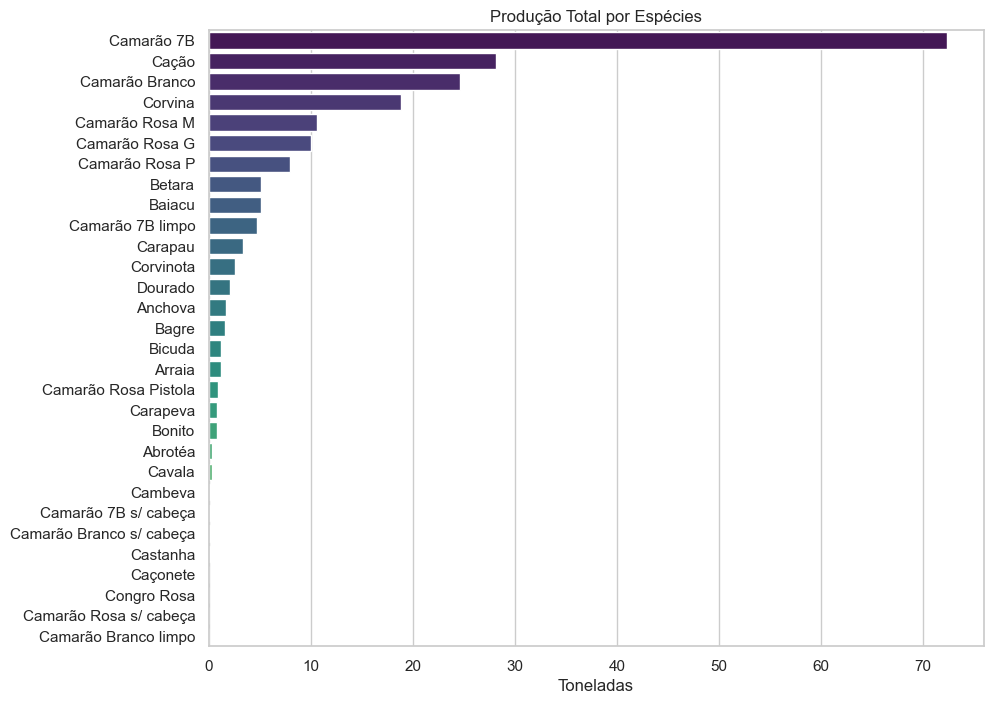

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a quantidade total por espécie (Produção Total)
quantidade_total_por_especie = df.groupby('Espécie')['Qtd(Kg)'].sum().reset_index()

# Converter a quantidade total de Kg para toneladas
quantidade_total_por_especie['Qtd(Ton)'] = quantidade_total_por_especie['Qtd(Kg)'] / 1000

# Selecionar apenas as primeiras 30 linhas
quantidade_total_por_especie = quantidade_total_por_especie.head(30)

# Ordenar as espécies pela quantidade total em ordem decrescente
quantidade_total_por_especie = quantidade_total_por_especie.sort_values(by='Qtd(Kg)', ascending=False)

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Qtd(Ton)', y='Espécie', data=quantidade_total_por_especie, palette='viridis')
plt.title('Produção Total por Espécies')
plt.xlabel('Toneladas')
plt.ylabel('')
plt.show()

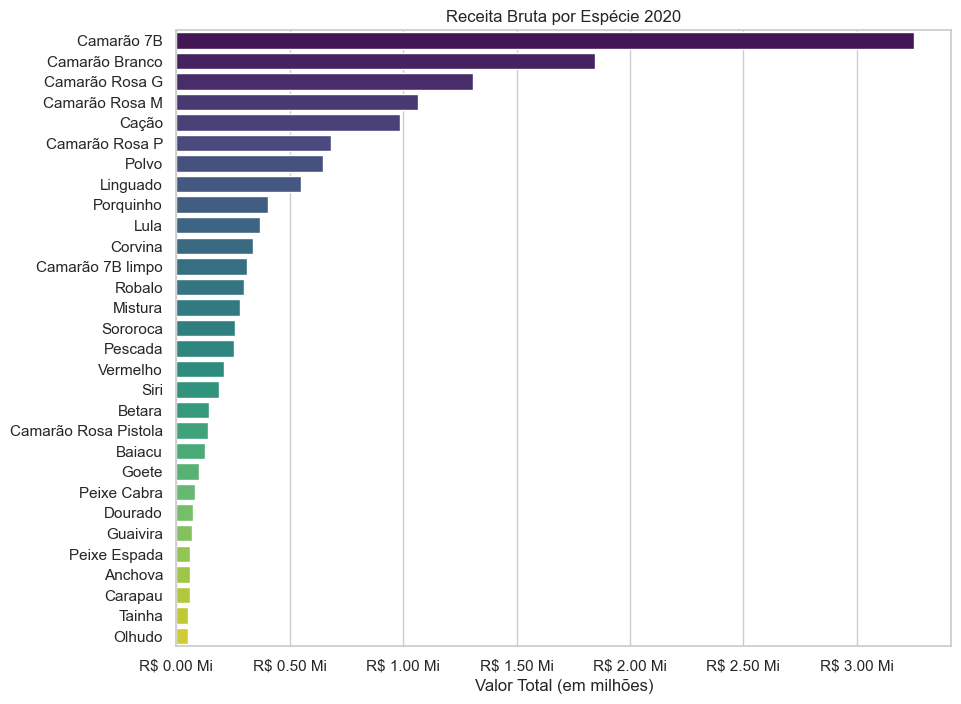

In [35]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# Calcular o valor total por espécie
valor_total_por_especie = df.groupby('Espécie')['Valor Total (R$)'].sum().reset_index()

# Converter o valor total para milhões
valor_total_por_especie['Valor Total (R$) (Milhões)'] = valor_total_por_especie['Valor Total (R$)'] / 1_000_000

# Selecionar apenas as 30 primeiras linhas e ordenar em ordem decrescente
valor_total_por_especie = valor_total_por_especie.nlargest(30, 'Valor Total (R$)')

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Valor Total (R$) (Milhões)', y='Espécie', data=valor_total_por_especie, palette='viridis')

# Definir o formato do eixo x para mostrar os valores em milhões
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R$ {x:,.2f} Mi'))

plt.title('Receita Bruta por Espécie 2020')
plt.xlabel('Valor Total (em milhões)')
plt.ylabel('')
plt.show()

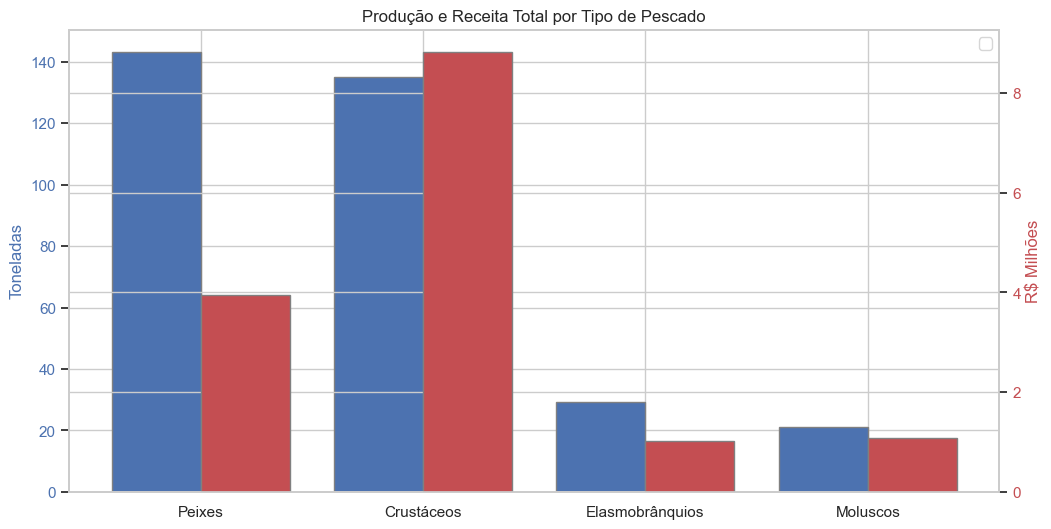

In [36]:
#Criar um grafico para mostrar a Receita Bruta e Produção Total por tipo de pescado
# Agrupando os dados por Classificação e somando Qtd(Kg) e Valor Total (R$)
agrupado = df.groupby('Classificação').agg({'Qtd(Kg)': 'sum', 'Valor Total (R$)': 'sum'}).reset_index()

# Convertendo a quantidade para toneladas e os valores para milhões
agrupado['Qtd(Ton)'] = agrupado['Qtd(Kg)'] / 1000
agrupado['Valor Total (R$) (Milhões)'] = agrupado['Valor Total (R$)'] / 1000000

# Ordenando os dados do maior para o menor
agrupado = agrupado.sort_values(by='Qtd(Ton)', ascending=False)

# Criando a visualização
fig, ax1 = plt.subplots(figsize=(12, 6))

barWidth = 0.4

r1 = np.arange(len(agrupado['Classificação']))
r2 = [x + barWidth for x in r1]

# Barras para a quantidade (eixo esquerdo)
ax1.bar(r1, agrupado['Qtd(Ton)'], color='b', width=barWidth, edgecolor='grey', label='Quantidade (Ton)')
ax1.set_ylabel('Toneladas', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Eixo direito para o valor total
ax2 = ax1.twinx()
ax2.bar(r2, agrupado['Valor Total (R$) (Milhões)'], color='r', width=barWidth, edgecolor='grey', label='Valor Total (R$) (Milhões)')
ax2.set_ylabel('R$ Milhões', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adicionando labels e ticks
ax1.set_xlabel('')
ax1.set_title('Produção e Receita Total por Tipo de Pescado')
ax1.set_xticks([r + barWidth/2 for r in range(len(agrupado['Classificação']))])
ax1.set_xticklabels(agrupado['Classificação'])
ax1.legend('')

# Exibindo o gráfico
plt.show()

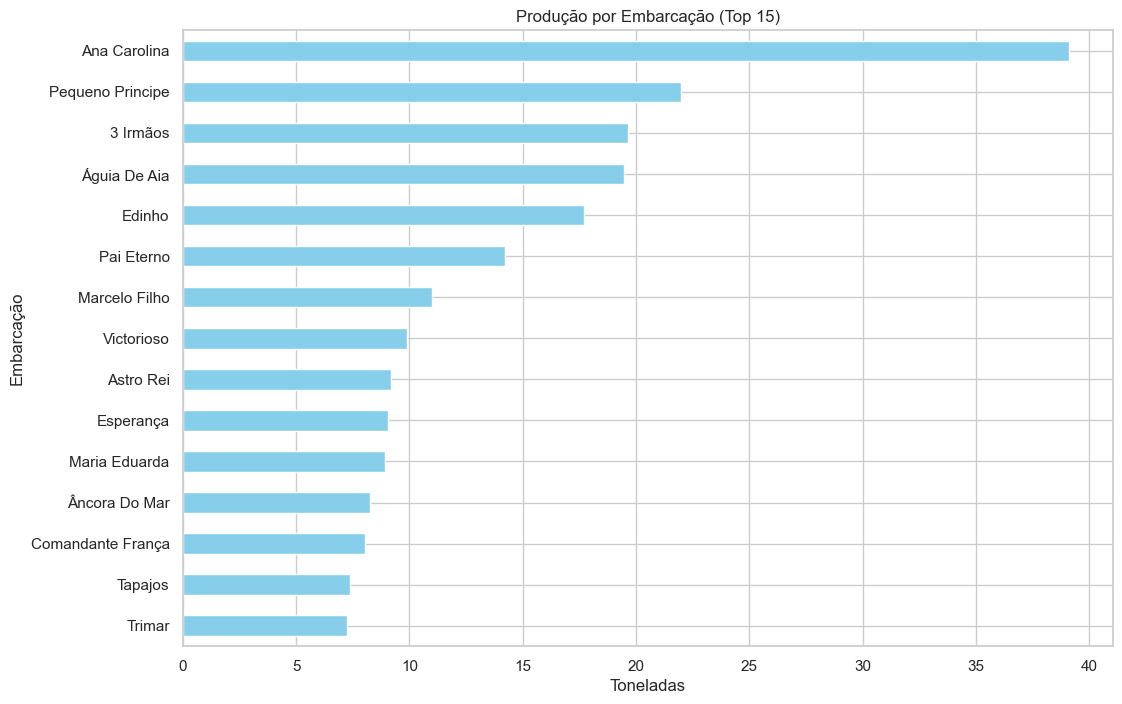

In [37]:
import matplotlib.pyplot as plt
# Agora criar um grafico de Produção por Embarcação

# Convertendo a quantidade para toneladas (se necessário)
df['Qtd(Ton)'] = df['Qtd(Kg)'] / 1000

# Agrupando por embarcação e somando a quantidade em toneladas
top_embarcacoes = df.groupby('Embarcação')['Qtd(Ton)'].sum().nlargest(15)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
top_embarcacoes.plot(kind='barh', color='skyblue')
plt.xlabel('Toneladas')
plt.ylabel('Embarcação')
plt.title('Produção por Embarcação (Top 15)')
plt.gca().invert_yaxis()  # Inverter a ordem das barras para a maior estar no topo
plt.show()


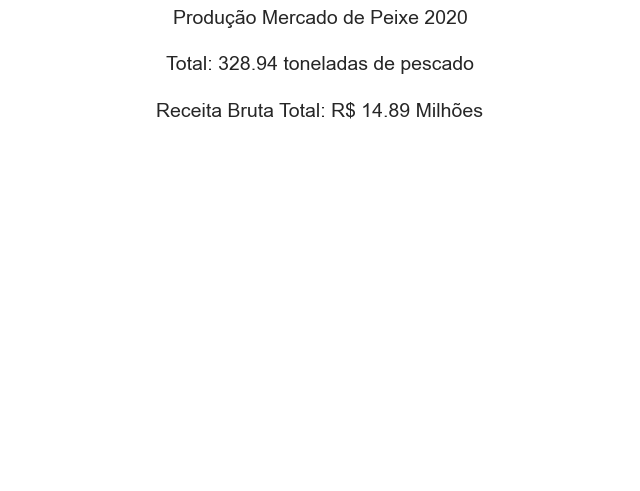

In [38]:
#Por fim calcular a Produção Total e Receita Bruta do Mercado de Peixe em 2020

# Calculando a quantidade total em toneladas e o valor total em milhões
qtd_total_ton = df['Qtd(Kg)'].sum() / 1000  # Convertendo de Kg para Ton
valor_total_milhoes = df['Valor Total (R$)'].sum() / 1_000_000  # Convertendo de R$ para Milhões

# Criando o cartão
fig, ax = plt.subplots(figsize=(8, 6))

# Configurando o estilo do cartão
ax.set_facecolor('#f0f0f0')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Adicionando textos ao cartão
ax.text(0.5, 1.0, f"Produção Mercado de Peixe 2020", ha='center', va='center', fontsize=14)
ax.text(0.5, 0.9, f"Total: {qtd_total_ton:.2f} toneladas de pescado", ha='center', va='center', fontsize=14)
ax.text(0.5, 0.8, f"Receita Bruta Total: R$ {valor_total_milhoes:.2f} Milhões", ha='center', va='center', fontsize=14)

plt.show()